In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv('Resources/charity_data.csv')
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
#drop the non-beneficial ID columns, 'EIN' and 'Name'
application_df = application_df.drop(["EIN","NAME"],axis=1)

In [3]:
#determine the number of unique values in each column
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
#look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

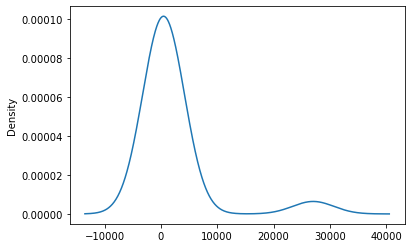

In [5]:
#Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [6]:
#determine which values to replace if counts are less than
replace_application = application_counts[application_counts < 500].index.tolist()

#replace in df
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
#check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
#look at classification value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts.head(50)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C2400        6
C1720        6
C4100        6
C1600        5
C1257        5
C2710        3
C0           3
C1260        3
C1246        2
C1267        2
C1234        2
C1256        2
C3200        2
C8210        1
C4500        1
C2500        1
C1580        1
C1283        1
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

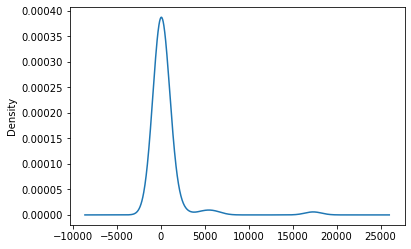

In [8]:
#visualize value counts of classification
classification_counts.plot.density()

In [9]:
#determine which values to replace if counts are less than
replace_class = classification_counts[classification_counts < 800].index.tolist()

#replace in df
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
#check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
#generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [11]:
#create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

#fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

#add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
#merge OneHot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
#split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns=["IS_SUCCESSFUL"])

#split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [14]:
#create a StandardScaler instances
scaler = StandardScaler()

#fit the StandardScaler
X_scaler = scaler.fit(X_train)

#scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
#define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train_scaled[0])
hidden_nodes1 = 80
hidden_nodes2 = 30

nn = tf.keras.models.Sequential()

#first hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim=num_input_features, activation="relu"))

#second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes2, activation="relu"))

#output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [16]:
#import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#define the checkpoint path and file names
os.makedirs("checkpoints_optimizer1/", exist_ok=True)
checkpoint_path = "checkpoints_optimizer1/weights.{epoch:02d}.hdf5"

In [17]:
#compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
#create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_weights_only=True, save_freq=5)

In [ ]:
#train the model
fit_model = nn.fit(X_train, y_train, epochs=50, callbacks=[cp_callback])

Epoch 1/50
  1/804 [..............................] - ETA: 6:51 - loss: 3796.4526 - accuracy: 0.4062
Epoch 00001: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1\weights.01.hdf5
 13/804 [..............................] - ETA: 3s - loss: 16942.9297 - accuracy: 0.4543 
Epoch 00001: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1\weights.01.hdf5
 26/804 [..............................] - ETA: 3s - loss: 11475.5352 - accuracy: 0.4519
Epoch 00001: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1\weights.01.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 22981.1426 - accuracy: 0.4702
Epoch 00001: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 00001: 


Epoch 00001: saving model to checkpoints_optimizer1\weights.01.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 175956.1406 - accuracy: 0.4961
Epoch 00001: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1\weights.01.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 184293.7500 - accuracy: 0.4956
Epoch 00001: saving model to checkpoints_optimizer1\weights.01.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 180629.6719 - accuracy: 0.4945
Epoch 00001: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer1\weights.01.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 178685.6250 - accuracy: 0.4933
Epoch 00001: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 00001: saving mo

 12/804 [..............................] - ETA: 4s - loss: 5138.4214 - accuracy: 0.4245
Epoch 00002: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1\weights.02.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 2402.9373 - accuracy: 0.4595
Epoch 00002: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1\weights.02.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 3038.9453 - accuracy: 0.4829
Epoch 00002: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1\weights.02.hdf5
 53/804 [>.............................] - ETA: 3s - loss: 2818.5947 - accuracy: 0.4965
Epoch 00002: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 00002: saving model to c

384/804 [=============>................] - ETA: 2s - loss: 5373.2417 - accuracy: 0.5079
Epoch 00002: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1\weights.02.hdf5
402/804 [==============>...............] - ETA: 2s - loss: 5134.6021 - accuracy: 0.5089
Epoch 00002: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1\weights.02.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 5049.6753 - accuracy: 0.5088
Epoch 00002: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer1\weights.02.hdf5
432/804 [===============>..............] - ETA: 2

Epoch 3/50
  1/804 [..............................] - ETA: 2s - loss: 375.8895 - accuracy: 0.5625
Epoch 00003: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1\weights.03.hdf5
  9/804 [..............................] - ETA: 5s - loss: 2961.0193 - accuracy: 0.5347
Epoch 00003: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1\weights.03.hdf5
 18/804 [..............................] - ETA: 4s - loss: 3524.8145 - accuracy: 0.5330
Epoch 00003: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1\weights.03.hdf5
 32/804 [>.............................] - ETA: 3s - loss: 2731.8208 - accuracy: 0.5400
Epoch 00003: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 00003: saving 

413/804 [==============>...............] - ETA: 1s - loss: 51993.9961 - accuracy: 0.4855
Epoch 00003: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1\weights.03.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 50201.6914 - accuracy: 0.4850
Epoch 00003: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1\weights.03.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 48528.7734 - accuracy: 0.4848
Epoch 00003: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer1\weights.03.hdf5
458/804 [================>.............] - ETA: 1s - loss: 46944.9258 - accuracy: 0.4866
Epoch 00003: saving model 


Epoch 00004: saving model to checkpoints_optimizer1\weights.04.hdf5
 29/804 [>.............................] - ETA: 2s - loss: 137455.7969 - accuracy: 0.5312
Epoch 00004: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1\weights.04.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 129176.3672 - accuracy: 0.5241
Epoch 00004: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1\weights.04.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 99632.7109 - accuracy: 0.5349 
Epoch 00004: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1\weights.04.hdf5
 74/804 [=>............................] - 

439/804 [===============>..............] - ETA: 1s - loss: 77485.9219 - accuracy: 0.5045
Epoch 00004: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1\weights.04.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 83251.3828 - accuracy: 0.5043
Epoch 00004: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1\weights.04.hdf5
469/804 [================>.............] - ETA: 1s - loss: 89947.2188 - accuracy: 0.5056
Epoch 00004: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer1\weights.04.hdf5
484/804 [=================>............] - ETA: 1s - loss: 88120.4141 - accuracy: 0.5076
Epoch 00004: saving model 

 45/804 [>.............................] - ETA: 2s - loss: 8804.8096 - accuracy: 0.5146
Epoch 00005: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1\weights.05.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 11505.5088 - accuracy: 0.5133
Epoch 00005: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1\weights.05.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 14542.0918 - accuracy: 0.5230
Epoch 00005: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1\weights.05.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 12842.9053 - accuracy: 0.5285
Epoch 00005: saving model t


Epoch 00005: saving model to checkpoints_optimizer1\weights.05.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 9384.9043 - accuracy: 0.5050
Epoch 00005: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1\weights.05.hdf5
465/804 [================>.............] - ETA: 1s - loss: 9112.3584 - accuracy: 0.5056
Epoch 00005: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1\weights.05.hdf5
482/804 [================>.............] - ETA: 1s - loss: 8811.7012 - accuracy: 0.5061
Epoch 00005: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer1\weights.05.hdf5
497/804 [=================>............] - ETA: 1

 53/804 [>.............................] - ETA: 3s - loss: 28370.7617 - accuracy: 0.4953
Epoch 00006: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1\weights.06.hdf5
 66/804 [=>............................] - ETA: 3s - loss: 24810.2617 - accuracy: 0.5161
Epoch 00006: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1\weights.06.hdf5
 79/804 [=>............................] - ETA: 3s - loss: 21657.6855 - accuracy: 0.5229
Epoch 00006: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1\weights.06.hdf5
 91/804 [==>...........................] - ETA: 3s - loss: 25678.1406 - accuracy: 0.5261
Epoch 00006: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 00006: saving model 

466/804 [================>.............] - ETA: 1s - loss: 55907.8086 - accuracy: 0.5013
Epoch 00006: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1\weights.06.hdf5
481/804 [================>.............] - ETA: 1s - loss: 54390.9961 - accuracy: 0.4996
Epoch 00006: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1\weights.06.hdf5
496/804 [=================>............] - ETA: 1s - loss: 52781.4883 - accuracy: 0.4981
Epoch 00006: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer1\weights.06.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 51424.6992 - accuracy: 0.4968
Epoch 00006: saving model 

 72/804 [=>............................] - ETA: 2s - loss: 89.2007 - accuracy: 0.5282 
Epoch 00007: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1\weights.07.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 93.6408 - accuracy: 0.5280
Epoch 00007: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1\weights.07.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 112.8171 - accuracy: 0.5227
Epoch 00007: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1\weights.07.hdf5
112/804 [===>..........................] - ETA: 2s - loss: 704.6413 - accuracy: 0.5257
Epoch 00007: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 00007: saving model to checkp

490/804 [=================>............] - ETA: 1s - loss: 7328.6338 - accuracy: 0.4973
Epoch 00007: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1\weights.07.hdf5
504/804 [=================>............] - ETA: 1s - loss: 7134.7515 - accuracy: 0.4980
Epoch 00007: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1\weights.07.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 6944.9722 - accuracy: 0.4985
Epoch 00007: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer1\weights.07.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 6819.5488 - accuracy: 0.4980
Epoch 00007: saving model to c

 97/804 [==>...........................] - ETA: 2s - loss: 4614.9263 - accuracy: 0.5309
Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5
113/804 [===>..........................] - ETA: 2s - loss: 5349.1816 - accuracy: 0.5265
Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5
128/804 [===>..........................] - ETA: 2s - loss: 5003.4614 - accuracy: 0.5232
Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5
144/804 [====>.........................] - ETA: 2


Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 18026.1738 - accuracy: 0.5005
Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 17610.4336 - accuracy: 0.4994
Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 17224.0781 - accuracy: 0.4983
Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer1\weights.08.hdf5
563/804 [====================>.........] - ETA

119/804 [===>..........................] - ETA: 2s - loss: 3355.2522 - accuracy: 0.5213
Epoch 00009: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1\weights.09.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 3040.9587 - accuracy: 0.5227
Epoch 00009: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1\weights.09.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 3418.4958 - accuracy: 0.5243
Epoch 00009: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1\weights.09.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 3132.5715 - accuracy: 0.5267
Epoch 00009: saving model to c


Epoch 00009: saving model to checkpoints_optimizer1\weights.09.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 30970.4531 - accuracy: 0.5029
Epoch 00009: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1\weights.09.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 30390.7363 - accuracy: 0.5027
Epoch 00009: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1\weights.09.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 29633.1504 - accuracy: 0.5024
Epoch 00009: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer1\weights.09.hdf5
589/804 [====================>.........] - ETA


Epoch 00010: saving model to checkpoints_optimizer1\weights.10.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 2757.3811 - accuracy: 0.5098
Epoch 00010: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1\weights.10.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 2815.1016 - accuracy: 0.5055
Epoch 00010: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1\weights.10.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 2593.2397 - accuracy: 0.5035
Epoch 00010: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1\weights.10.hdf5
195/804 [======>.......................] - ETA: 2

564/804 [====================>.........] - ETA: 0s - loss: 3811.0581 - accuracy: 0.5171
Epoch 00010: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1\weights.10.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 4122.2983 - accuracy: 0.5168
Epoch 00010: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1\weights.10.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 4123.9429 - accuracy: 0.5177
Epoch 00010: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer1\weights.10.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 7248.8652 - accuracy: 0.5176
Epoch 00010: saving model to c


Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5
171/804 [=====>........................] - ETA: 2s - loss: 806.9241 - accuracy: 0.5287
Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5
186/804 [=====>........................] - ETA: 2s - loss: 967.8701 - accuracy: 0.5257
Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5
201/804 [======>.......................] - ETA: 2s - loss: 918.0065 - accuracy: 0.5255
Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5
216/804 [=======>......................] - ETA: 2s -


Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 4641.8149 - accuracy: 0.5034
Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 4533.4927 - accuracy: 0.5035
Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 4438.1250 - accuracy: 0.5037
Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer1\weights.11.hdf5
637/804 [======================>.......] - ETA: 0

192/804 [======>.......................] - ETA: 2s - loss: 13793.9648 - accuracy: 0.5164
Epoch 00012: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1\weights.12.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 83827.2656 - accuracy: 0.5165
Epoch 00012: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1\weights.12.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 80790.8438 - accuracy: 0.5179
Epoch 00012: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1\weights.12.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 76245.9141 - accuracy: 0.5167
Epoch 00012: saving model 

612/804 [=====================>........] - ETA: 0s - loss: 40598.5273 - accuracy: 0.4961
Epoch 00012: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1\weights.12.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 39801.2422 - accuracy: 0.4981
Epoch 00012: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1\weights.12.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 39574.0664 - accuracy: 0.4988
Epoch 00012: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer1\weights.12.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 38797.8008 - accuracy: 0.4982
Epoch 00012: saving model 


Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 19632.9570 - accuracy: 0.5332
Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5
243/804 [========>.....................] - ETA: 1s - loss: 18526.1777 - accuracy: 0.5293
Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 17548.2070 - accuracy: 0.5287
Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5
273/804 [=========>....................] - ETA


Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 15482.3730 - accuracy: 0.5023
Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 15175.1006 - accuracy: 0.5015
Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 14895.7676 - accuracy: 0.5002
Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer1\weights.13.hdf5
696/804 [========================>.....] - ETA


Epoch 00014: saving model to checkpoints_optimizer1\weights.14.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 1042.5599 - accuracy: 0.5273
Epoch 00014: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1\weights.14.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 1239.6898 - accuracy: 0.5289
Epoch 00014: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1\weights.14.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 4632.5308 - accuracy: 0.5286
Epoch 00014: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1\weights.14.hdf5
299/804 [==========>...................] - ETA: 1

669/804 [=======================>......] - ETA: 0s - loss: 8909.8359 - accuracy: 0.5176
Epoch 00014: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1\weights.14.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 9112.4043 - accuracy: 0.5160
Epoch 00014: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1\weights.14.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 9151.1006 - accuracy: 0.5154
Epoch 00014: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer1\weights.14.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 9031.1816 - accuracy: 0.5146
Epoch 00014: saving model to c


Epoch 00015: saving model to checkpoints_optimizer1\weights.15.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 24413.8535 - accuracy: 0.5108
Epoch 00015: saving model to checkpoints_optimizer1\weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer1\weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer1\weights.15.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 23239.6094 - accuracy: 0.5072
Epoch 00015: saving model to checkpoints_optimizer1\weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer1\weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer1\weights.15.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 22566.5840 - accuracy: 0.5051
Epoch 00015: saving model to checkpoints_optimizer1\weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer1\weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer1\weights.15.hdf5
325/804 [===========>..................] - ETA

696/804 [========================>.....] - ETA: 0s - loss: 10853.5762 - accuracy: 0.5022
Epoch 00015: saving model to checkpoints_optimizer1\weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer1\weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer1\weights.15.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 10666.7432 - accuracy: 0.5019
Epoch 00015: saving model to checkpoints_optimizer1\weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer1\weights.15.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 10942.7295 - accuracy: 0.5008
Epoch 00015: saving model to checkpoints_optimizer1\weights.15.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 11656.9385 - accuracy: 0.5006
Epoch 00015: saving model to checkpoints_optimizer1\weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer1\weights.15.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 11565.7793 - accuracy: 0.5002
Epoch 0


Epoch 00016: saving model to checkpoints_optimizer1\weights.16.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 9740.1191 - accuracy: 0.4746 
Epoch 00016: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1\weights.16.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 9394.0439 - accuracy: 0.4741
Epoch 00016: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1\weights.16.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 9368.6953 - accuracy: 0.4747
Epoch 00016: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1\weights.16.hdf5
346/804 [===========>..................] - ETA: 

701/804 [=========================>....] - ETA: 0s - loss: 4560.4980 - accuracy: 0.5150
Epoch 00016: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1\weights.16.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 4506.8564 - accuracy: 0.5147
Epoch 00016: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1\weights.16.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 4446.8521 - accuracy: 0.5147
Epoch 00016: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1\weights.16.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 4389.4346 - accuracy: 0.5154
Epoch 00016: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer1\weights.16.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 4341.2178 - accuracy: 0.5162
Epoch 00016:

287/804 [=========>....................] - ETA: 2s - loss: 2969.4067 - accuracy: 0.5118
Epoch 00017: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1\weights.17.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 2830.4934 - accuracy: 0.5153
Epoch 00017: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1\weights.17.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 2704.8796 - accuracy: 0.5219
Epoch 00017: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1\weights.17.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 2596.0227 - accuracy: 0.5232
Epoch 00017: saving model to c

707/804 [=========================>....] - ETA: 0s - loss: 1683.9636 - accuracy: 0.5401
Epoch 00017: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1\weights.17.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 1650.1276 - accuracy: 0.5412
Epoch 00017: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1\weights.17.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 1617.8794 - accuracy: 0.5415
Epoch 00017: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer1\weights.17.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 1587.4059 - accuracy: 0.5409
Epoch 00017: saving model to c

318/804 [==========>...................] - ETA: 1s - loss: 1056.3077 - accuracy: 0.5560
Epoch 00018: saving model to checkpoints_optimizer1\weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1\weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1\weights.18.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 1012.8281 - accuracy: 0.5593
Epoch 00018: saving model to checkpoints_optimizer1\weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1\weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1\weights.18.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 1054.7755 - accuracy: 0.5614
Epoch 00018: saving model to checkpoints_optimizer1\weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1\weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1\weights.18.hdf5
364/804 [============>.................] - ETA: 1s - loss: 1047.2463 - accuracy: 0.5604
Epoch 00018: saving model to c

738/804 [==========================>...] - ETA: 0s - loss: 3754.8796 - accuracy: 0.5347
Epoch 00018: saving model to checkpoints_optimizer1\weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1\weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1\weights.18.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 3731.7168 - accuracy: 0.5348
Epoch 00018: saving model to checkpoints_optimizer1\weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1\weights.18.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 3687.1150 - accuracy: 0.5350
Epoch 00018: saving model to checkpoints_optimizer1\weights.18.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 3653.7922 - accuracy: 0.5346
Epoch 00018: saving model to checkpoints_optimizer1\weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer1\weights.18.hdf5
778/804 [============================>.] - ETA: 0s - loss: 3622.8181 - accuracy: 0.5345
Epoch 00018:

269/804 [=========>....................] - ETA: 4s - loss: 1081.1123 - accuracy: 0.4941
Epoch 00019: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1\weights.19.hdf5
279/804 [=========>....................] - ETA: 4s - loss: 1116.4823 - accuracy: 0.4920
Epoch 00019: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1\weights.19.hdf5
289/804 [=========>....................] - ETA: 3s - loss: 1092.1287 - accuracy: 0.4922
Epoch 00019: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1\weights.19.hdf5
299/804 [==========>...................] - ETA: 3s - loss: 1070.1599 - accuracy: 0.4908
Epoch 00019: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1\weights.19.hdf5
309/804 [==========>...................] - ETA: 3s - loss: 2649.9504 - accuracy: 0.4908
Epoch 00019:


Epoch 00019: saving model to checkpoints_optimizer1\weights.19.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 1867.1235 - accuracy: 0.5081
Epoch 00019: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1\weights.19.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 1827.3085 - accuracy: 0.5090
Epoch 00019: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1\weights.19.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 1812.9066 - accuracy: 0.5103
Epoch 00019: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer1\weights.19.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 1786.3225 - accuracy: 0.5108
Epoch 00019: saving model to c


Epoch 00020: saving model to checkpoints_optimizer1\weights.20.hdf5
288/804 [=========>....................] - ETA: 1s - loss: 1027.9556 - accuracy: 0.5442
Epoch 00020: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer1\weights.20.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 1154.5927 - accuracy: 0.5438
Epoch 00020: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer1\weights.20.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 1107.7118 - accuracy: 0.5443
Epoch 00020: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer1\weights.20.hdf5
334/804 [===========>..................] - ETA: 1


Epoch 00020: saving model to checkpoints_optimizer1\weights.20.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 2549.3652 - accuracy: 0.5371
Epoch 00020: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer1\weights.20.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 2876.2046 - accuracy: 0.5356
Epoch 00020: saving model to checkpoints_optimizer1\weights.20.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 2852.8054 - accuracy: 0.5353
Epoch 00020: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer1\weights.20.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 2834.9062 - accuracy: 0.5353
Epoch 00020: saving model to checkpoints_optimizer1\weights.20.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 2822.9961 - accuracy: 0.5345
Epoch 00020: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 00020:

201/804 [======>.......................] - ETA: 4s - loss: 2417.3184 - accuracy: 0.4947
Epoch 00021: saving model to checkpoints_optimizer1\weights.21.hdf5
210/804 [======>.......................] - ETA: 4s - loss: 4915.5688 - accuracy: 0.4927
Epoch 00021: saving model to checkpoints_optimizer1\weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1\weights.21.hdf5
216/804 [=======>......................] - ETA: 4s - loss: 4841.7153 - accuracy: 0.4905
Epoch 00021: saving model to checkpoints_optimizer1\weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1\weights.21.hdf5
226/804 [=======>......................] - ETA: 4s - loss: 4641.7954 - accuracy: 0.4896
Epoch 00021: saving model to checkpoints_optimizer1\weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1\weights.21.hdf5
236/804 [=======>......................] - ETA: 4s - loss: 4471.3291 - accuracy: 0.4906
Epoch 00021: saving model to checkpoints_optimizer1\weights.21.hdf5

Epoch 00021:


Epoch 00021: saving model to checkpoints_optimizer1\weights.21.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 2579.0327 - accuracy: 0.5073
Epoch 00021: saving model to checkpoints_optimizer1\weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1\weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1\weights.21.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 2517.4331 - accuracy: 0.5079
Epoch 00021: saving model to checkpoints_optimizer1\weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1\weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1\weights.21.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 2458.5586 - accuracy: 0.5086
Epoch 00021: saving model to checkpoints_optimizer1\weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1\weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer1\weights.21.hdf5
656/804 [=======================>......] - ETA: 0


Epoch 00022: saving model to checkpoints_optimizer1\weights.22.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 3157.4673 - accuracy: 0.4895
Epoch 00022: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1\weights.22.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 2985.4797 - accuracy: 0.4874
Epoch 00022: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1\weights.22.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 2922.1196 - accuracy: 0.4892
Epoch 00022: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1\weights.22.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 2788.2297 - accuracy: 0.4864
Epoch 00022: saving model to c

592/804 [=====================>........] - ETA: 0s - loss: 1519.6794 - accuracy: 0.5099
Epoch 00022: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1\weights.22.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 1506.1815 - accuracy: 0.5101
Epoch 00022: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1\weights.22.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 1473.0444 - accuracy: 0.5117
Epoch 00022: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer1\weights.22.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 1490.2277 - accuracy: 0.5112
Epoch 00022: saving model to c

203/804 [======>.......................] - ETA: 2s - loss: 119.8399 - accuracy: 0.5023
Epoch 00023: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1\weights.23.hdf5
218/804 [=======>......................] - ETA: 2s - loss: 111.6678 - accuracy: 0.5032
Epoch 00023: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1\weights.23.hdf5
233/804 [=======>......................] - ETA: 2s - loss: 104.7569 - accuracy: 0.5042
Epoch 00023: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1\weights.23.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 105.9257 - accuracy: 0.5049
Epoch 00023: saving model to check


Epoch 00023: saving model to checkpoints_optimizer1\weights.23.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 657.2463 - accuracy: 0.5006
Epoch 00023: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1\weights.23.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 643.6642 - accuracy: 0.5005
Epoch 00023: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1\weights.23.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 638.6942 - accuracy: 0.4990
Epoch 00023: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer1\weights.23.hdf5
673/804 [========================>.....] - ETA: 0s -


Epoch 00024: saving model to checkpoints_optimizer1\weights.24.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 81.2679 - accuracy: 0.5241
Epoch 00024: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1\weights.24.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 76.5116 - accuracy: 0.5240
Epoch 00024: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1\weights.24.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 72.0365 - accuracy: 0.5272
Epoch 00024: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1\weights.24.hdf5
284/804 [=========>....................] - ETA: 1s - lo

654/804 [=======================>......] - ETA: 0s - loss: 68.5495 - accuracy: 0.5230
Epoch 00024: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1\weights.24.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 68.4463 - accuracy: 0.5227
Epoch 00024: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1\weights.24.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 73.3236 - accuracy: 0.5227
Epoch 00024: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer1\weights.24.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 71.9118 - accuracy: 0.5232
Epoch 00024: saving model to checkpoin

260/804 [========>.....................] - ETA: 2s - loss: 54.4412 - accuracy: 0.5204
Epoch 00025: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1\weights.25.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 137.9135 - accuracy: 0.5203
Epoch 00025: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1\weights.25.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 223.9498 - accuracy: 0.5233
Epoch 00025: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1\weights.25.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 231.0349 - accuracy: 0.5246
Epoch 00025: saving model to checkp

675/804 [========================>.....] - ETA: 0s - loss: 150.3928 - accuracy: 0.5248
Epoch 00025: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1\weights.25.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 147.7779 - accuracy: 0.5249
Epoch 00025: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1\weights.25.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 144.6350 - accuracy: 0.5255
Epoch 00025: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer1\weights.25.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 141.8204 - accuracy: 0.5255
Epoch 00025: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 00025: saving model to check

286/804 [=========>....................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 00026: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer1\weights.26.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5288
Epoch 00026: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer1\weights.26.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5290
Epoch 00026: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer1\weights.26.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 00026: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 00026: saving model to checkpoints_o

646/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00026: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer1\weights.26.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 00026: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer1\weights.26.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 00026: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer1\weights.26.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00026: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer1\weights.26.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00026: saving model t

252/804 [========>.....................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5269
Epoch 00027: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1\weights.27.hdf5
266/804 [========>.....................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5285
Epoch 00027: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1\weights.27.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5292
Epoch 00027: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1\weights.27.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5288
Epoch 00027: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 00027: saving model to checkpoints_o

672/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 00027: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1\weights.27.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00027: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1\weights.27.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 00027: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer1\weights.27.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 00027: saving model to checkpoints_o

In [ ]:
#evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
#export the model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization1.h5")